# Perceptron

Sometimes, the best way to understand something well is to start from the basics. That's why I decided to build a perceptron myself - one of the simplest and most fundamental models in machine learning.


**Import libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import pandas as pd
from IPython.display import display, Markdown
from pprint import pprint

Perceptron is a simple linear classifier, that makes decisions based on a weighted combination of its inputs. In other words, it uses a linear prediction function to figure out which class an input belongs to. Mathematically, it is described by the following formula:

$$
f(x) = h(\mathbf{w} \cdot \mathbf{x} + b))
$$

where:
- h - activation function (Heaviside step function typically in perceptrons)
- w - weight vector
- x - input vector
- b - bias

The perceptron algorithm consists of four main steps:
- set the threshold (bias)
- multiply inputs by their corresponding weights
- calculate the weighted sum
- apply the activation function to produce the output

In [2]:
class Perceptron:
    def __init__(self, learning_rate = 0.1, epochs = 100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.errors_history = []

    def activation_function(self, X):
        return np.where(X>=0,1,0) # if x>=0 then 1, else 0

    def net_input(self, X):
        return np.dot(X, self.weights) + self.bias # dot product of (input and weights) + bias

    def fit(self, X, y):
        n_samples , n_features = X.shape
        
        # initialize weights with random values from normal distribution (mean = 0, std deviation = 1)
        # then scale them by diving by the square root of the number of features
        self.weights = np.random.randn(n_features) / np.sqrt(n_features) 
        self.bias=0 # set neutral value

        print(f"initial weights: {self.weights}")
        print(f"initial bias: {self.bias}")
        
        # learning process
        for epoch in range(self.epochs):
            errors = 0
            
            for i in range(n_samples):
                net_input_value = self.net_input(X[i])

                prediction = self.activation_function(net_input_value)

                error = y[i] - prediction

                if error!=0:
                    # new_weight = old_weight + learning_rate * error * input
                    self.weights+= self.learning_rate * error * X[i]
                    self.bias+= self.learning_rate * error
                    errors+=1
            self.errors_history.append(errors)
            
            if (epoch + 1)%10 == 0:
                print(f"Epoch {epoch+1}: {errors} errors")

            if errors==0:
                print(f"The perception successfully learned by epoch {epoch +1}")
                break # if no errors we stop the learning process

    def predict(self, X):
        net_input_value = self.net_input(X)
        return self.activation_function(net_input_value)

    def score(self, X, y):
        predictions = self.predict(X)
        return np.mean(predictions==y)
                

In [3]:
# examples of linearly separable data
# in 2D, data is linearly separable when it can be divided into different classes by a straight line

def generate_random_classification_data(n_samples=100):
    X, y = make_classification(
        n_samples=n_samples,
        n_features=2,
        n_classes=2,
        n_redundant=0,
        n_informative=2,
        n_clusters_per_class=1,
        random_state=42
    )
    return X, y, "Random linearly separable data"

def generate_and_gate_data():
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([0, 0, 0, 1])
    return X, y, "AND gate"

def generate_or_gate_data():
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([0, 1, 1, 1])
    return X, y, "OR gate"

# example of non-linearly separable data

def generate_xor_gate_data():
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([0, 1, 1, 0])
    return X, y, "XOR gate"


The perceptron can learn only linearly separable problems. If the data is linearly separable, the perceptron algorithm is guaranteed to converge - it will find a solution in a finite number of steps. For non-linearly separable data, the perceptron will oscillate indefinitely, never finding a perfect solution.

In [4]:
def plot_data_and_decision_boundary(X, y, perceptron, title):
    
    plt.figure(figsize=(10, 8))
    
    colors = ['red', 'blue']
    for i in range(2):
        plt.scatter(X[y == i, 0], X[y == i, 1], 
                   c=colors[i], marker='o', s=100, 
                   label=f'class {i}', alpha=0.7)
    
    # draw the decision boundary if the perceptron is trained
    if perceptron.weights is not None:
        # decision boundary: w1*x1 + w2*x2 + bias = 0
        # transform to form: x2 = -(w1*x1 + bias) / w2
        
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        
        if perceptron.weights[1] != 0:
            x1_boundary = np.array([x_min, x_max])
            x2_boundary = -(perceptron.weights[0] * x1_boundary + perceptron.bias) / perceptron.weights[1]
            plt.plot(x1_boundary, x2_boundary, 'k--', linewidth=2, label='decision boundary')
    
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

def plot_error_history(perceptron, title):
    plt.figure(figsize=(10, 6))
    plt.plot(perceptron.errors_history, 'b-', linewidth=2, marker='o')
    plt.xlabel('epoch')
    plt.ylabel('number of errors')
    plt.title(f'Learning error history - {title}')
    plt.grid(True, alpha=0.3)
    plt.show()


In [5]:
def test_perceptron_on_dataset(X, y, title):
    
    # display section title
    display(Markdown(f"## 🔬 Testing: `{title}`"))
    display(Markdown("---"))

    # show input data
    display(Markdown("### Input Data"))
    for i in range(len(X)):
        print(f"X[{i}] = {X[i]}, y[{i}] = {y[i]}")

    # initialize and train the perceptron
    perceptron = Perceptron(learning_rate=0.1, epochs=100)
    perceptron.fit(X, y)

    # make predictions and evaluate accuracy
    predictions = perceptron.predict(X)
    accuracy = perceptron.score(X, y)

    # display results
    display(Markdown("### Results"))
    print(f"Predictions: {predictions}")
    print(f"True labels: {y}")
    print(f"Accuracy: {accuracy:.2%}")

    # display learned parameters
    display(Markdown("### Learned Parameters"))
    print(f"Weights: {perceptron.weights}")
    print(f"Bias: {perceptron.bias:.4f}")

    # visualize decision boundary and error history
    display(Markdown("### Visualization"))
    plot_data_and_decision_boundary(X, y, perceptron, title)
    plot_error_history(perceptron, title)

    display(Markdown("---"))
    return perceptron

## 🔬 Testing: `Random linearly separable data`

---

### Input Data

X[0] = [ 1.22831184 -0.75717844], y[0] = 0
X[1] = [ 0.69840909 -1.38029525], y[1] = 0
X[2] = [2.54881729 2.50225822], y[2] = 1
X[3] = [ 0.57357881 -1.35297943], y[3] = 0
X[4] = [ 0.58590018 -1.33745666], y[4] = 0
X[5] = [ 0.63356167 -1.17278867], y[5] = 0
X[6] = [ 0.55656344 -1.31038476], y[6] = 0
X[7] = [0.12437227 0.19896733], y[7] = 1
X[8] = [ 1.32272135 -0.59340317], y[8] = 0
X[9] = [1.42586898 1.39002959], y[9] = 1
X[10] = [ 0.63944087 -1.23395477], y[10] = 0
X[11] = [ 1.2349949  -0.73168763], y[11] = 0
X[12] = [0.73902766 0.82180719], y[12] = 1
X[13] = [2.22140553 2.10036638], y[13] = 1
X[14] = [3.08402116 2.83324852], y[14] = 1
X[15] = [ 1.00183089 -1.02646717], y[15] = 0
X[16] = [ 1.03307436 -0.85545993], y[16] = 0
X[17] = [0.10320711 0.21791213], y[17] = 1
X[18] = [0.57885884 0.56599415], y[18] = 1
X[19] = [1.71073996 1.56900774], y[19] = 1
X[20] = [ 1.1586864  -0.88167436], y[20] = 0
X[21] = [3.07317945 2.84564176], y[21] = 1
X[22] = [ 1.88782031 -0.36699364], y[22] = 0
X[23]

### Results

Predictions: [0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1
 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0
 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1]
True labels: [0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1
 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0
 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1]
Accuracy: 100.00%


### Learned Parameters

Weights: [-0.17563724  0.31886429]
Bias: 0.2000


### Visualization

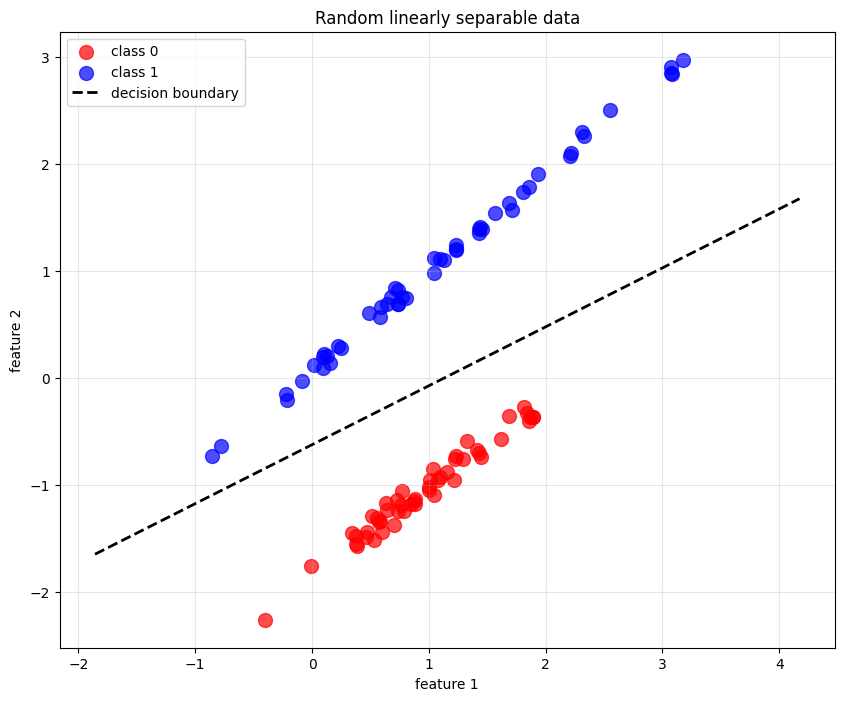

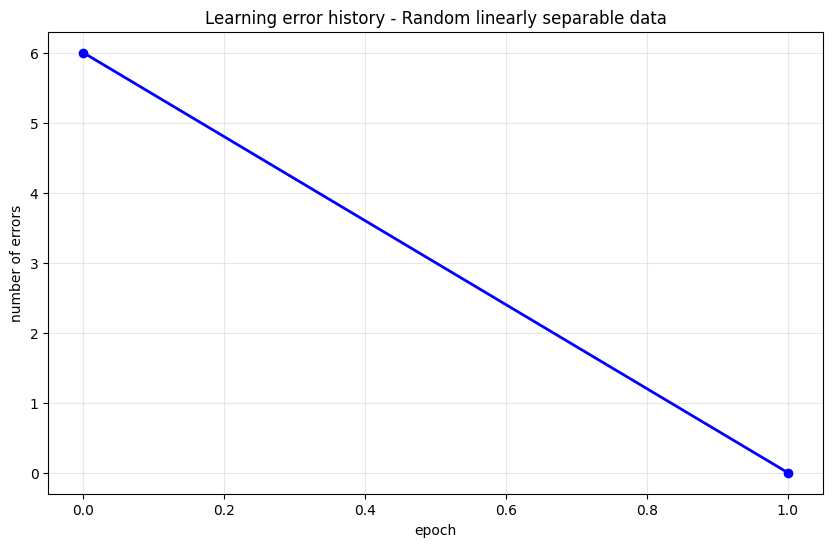

---

## 🔬 Testing: `AND gate`

---

### Input Data

X[0] = [0 0], y[0] = 0
X[1] = [0 1], y[1] = 0
X[2] = [1 0], y[2] = 0
X[3] = [1 1], y[3] = 1
initial weights: [-1.19542931  0.15746292]
initial bias: 0
Epoch 10: 2 errors
The perception successfully learned by epoch 18


### Results

Predictions: [0 0 0 1]
True labels: [0 0 0 1]
Accuracy: 100.00%


### Learned Parameters

Weights: [0.20457069 0.15746292]
Bias: -0.3000


### Visualization

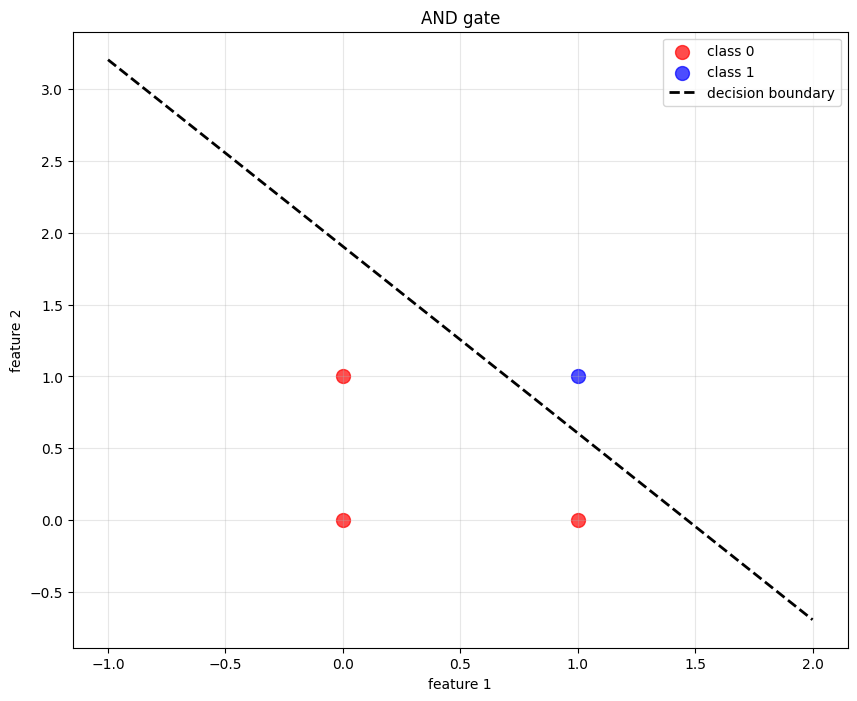

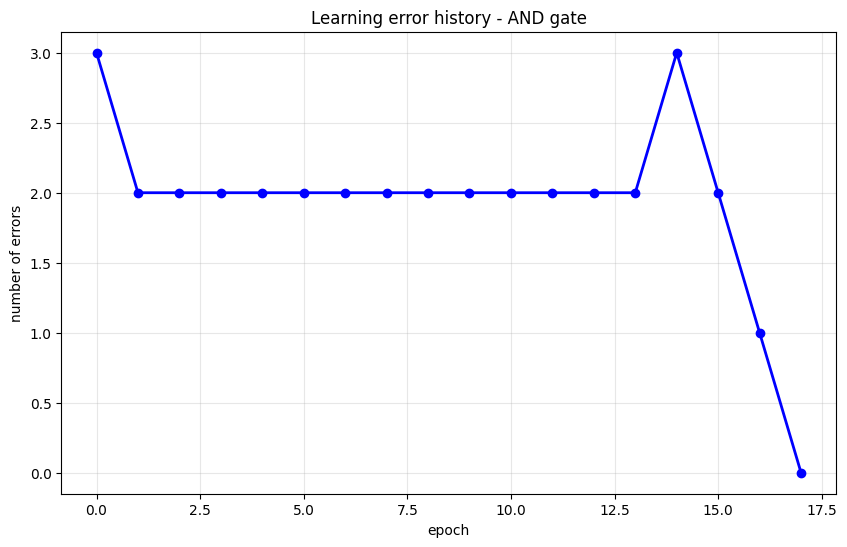

---

## 🔬 Testing: `OR gate`

---

### Input Data

X[0] = [0 0], y[0] = 0
X[1] = [0 1], y[1] = 1
X[2] = [1 0], y[2] = 1
X[3] = [1 1], y[3] = 1
initial weights: [-0.28661176 -0.00922095]
initial bias: 0
The perception successfully learned by epoch 8


### Results

Predictions: [0 1 1 1]
True labels: [0 1 1 1]
Accuracy: 100.00%


### Learned Parameters

Weights: [0.11338824 0.19077905]
Bias: -0.1000


### Visualization

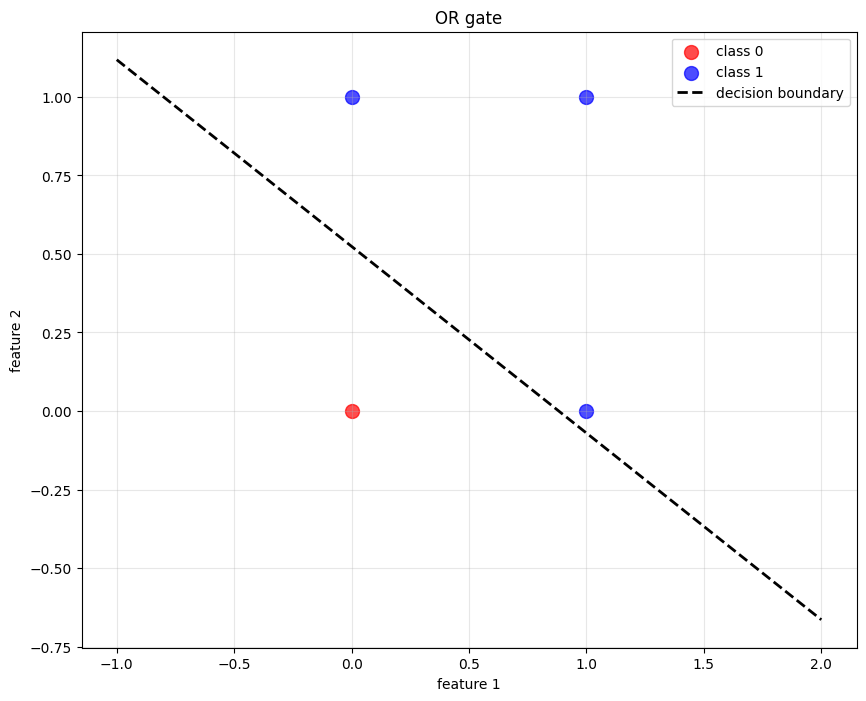

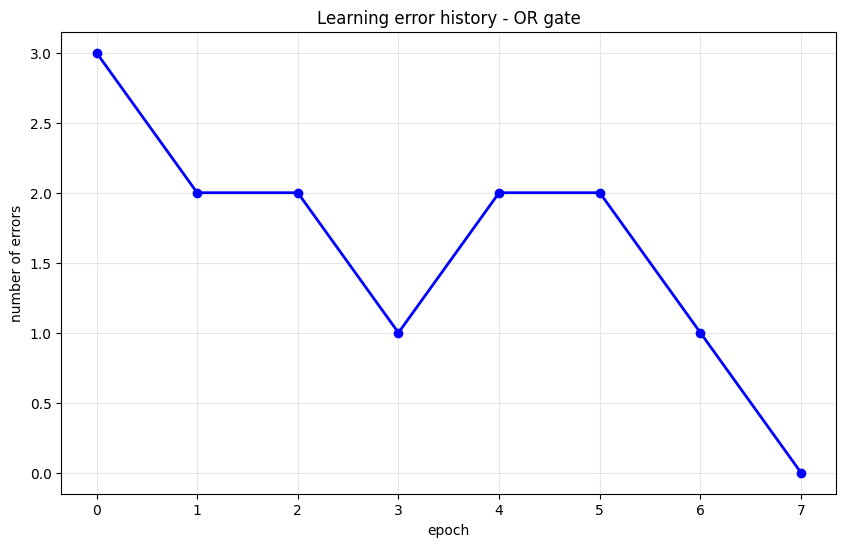

---

## 🔬 Testing: `XOR gate`

---

### Input Data

X[0] = [0 0], y[0] = 0
X[1] = [0 1], y[1] = 1
X[2] = [1 0], y[2] = 1
X[3] = [1 1], y[3] = 0
initial weights: [ 0.74063623 -0.21378136]
initial bias: 0
Epoch 10: 3 errors
Epoch 20: 4 errors
Epoch 30: 4 errors
Epoch 40: 4 errors
Epoch 50: 4 errors
Epoch 60: 4 errors
Epoch 70: 4 errors
Epoch 80: 4 errors
Epoch 90: 4 errors
Epoch 100: 4 errors


### Results

Predictions: [1 0 0 0]
True labels: [0 1 1 0]
Accuracy: 25.00%


### Learned Parameters

Weights: [-0.05936377 -0.11378136]
Bias: 0.0000


### Visualization

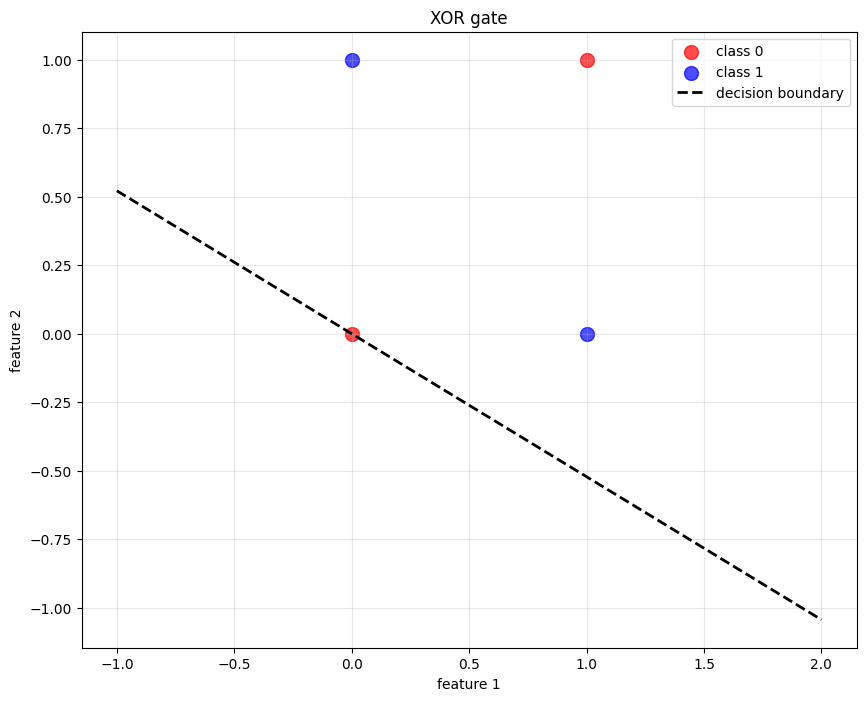

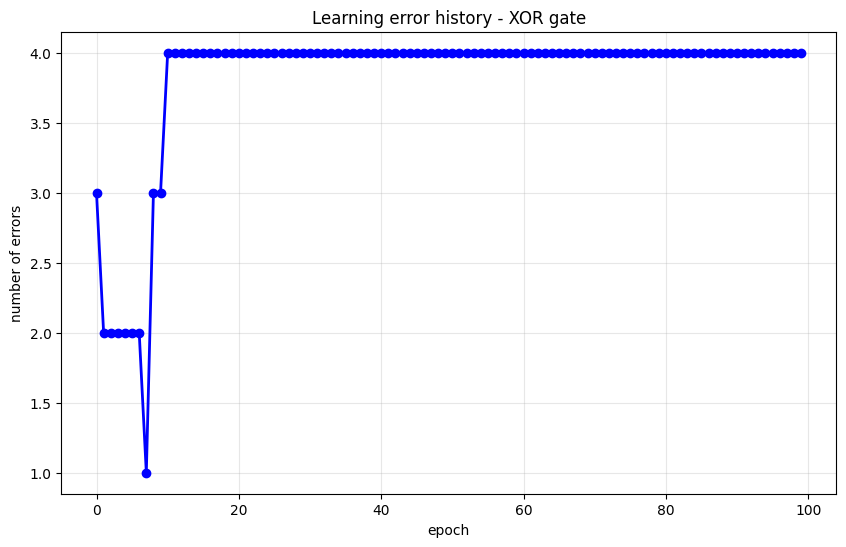

---

In [6]:
datasets = [
    generate_random_classification_data(),
    generate_and_gate_data(),
    generate_or_gate_data(),
    generate_xor_gate_data()
]

results = {}

for X, y, title in datasets:
    results[title] = test_perceptron_on_dataset(X, y, title)

# Why can't a perceptron solve XOR?

The XOR problem:  
(0, 0) → 0  
(0, 1) → 1  
(1, 0) → 1  
(1, 1) → 0

A perceptron creates a linear decision boundary of the form:  
$w_1 x_1 + w_2 x_2 + \text{bias} = 0$

Let's try to find such a line that separates the points correctly.

From the data:

- For $(0, 0) \rightarrow 0$: $\text{bias} < 0$  
- For $(0, 1) \rightarrow 1$: $w_2 + \text{bias} > 0$  
- For $(1, 0) \rightarrow 1$: $w_1 + \text{bias} > 0$  
- For $(1, 1) \rightarrow 0$: $w_1 + w_2 + \text{bias} < 0$

Now let's combine some equations:

From equations 2 and 3:  
→ $w_1 > -\text{bias}$  
→ $w_2 > -\text{bias}$  
→ So: $w_1 + w_2 > -2 \cdot \text{bias}$

But from equation 4:  
→ $w_1 + w_2 < -\text{bias}$

So we get:  
$-2 \cdot \text{bias} < -\text{bias}$ ⟹ $\text{bias} > 0$  
But from equation 1: $\text{bias} < 0$

**CONTRADICTION**  
That's why a single-layer perceptron can't solve the XOR problem - the data is not linearly separable.
